# **STATS 68: Lab Individual Assignment 2**
### **Points: 20**

---

Welcome to the first individual lab assignment for STATS 68. This assignment focuses on applying the data exploration concepts we've learned in class to a dataset of your choice. Dive deep, discover patterns, and prepare to share your insights!

## **Submission Guidelines:**

- Submit the assignment via version-control tool, i.e, git. Please have a look at the instruction on Canvas
- Due: Wednesday, 04/16/2025, 11:59pm PDT. 

## **Important Steps for Completing Notebook:**

1. **Regular Saving**: Frequently save your progress by clicking the save icon above. This ensures that all changes are preserved on your local computer.

2. **Final Checks**:
   - Before finalizing, restart the kernel and run all cells to ensure that your notebook executes correctly from start to finish.
   - Verify that no outputs or calculations have changed unexpectedly after rerunning the cells.


## Lab Study: Deep Analysis on Billionaires' Preference

In this assignment, we will have further investigations on the preference of the world's billionaires for 2021. We will use **forbes.cvs** data to answer some research problems.

---

Good luck, and enjoy exploring your dataset!


## 📚 Tutorial

The following tutorial may be helpful as you work through the **individual** lab assignment:

- Use them as references to reinforce your understanding.
- Feel free to revisit them whenever you need guidance or clarification.

> 🧠 Tip: Go through them before you work—they can save you time and help avoid common mistakes.


### Filtering with Multiple Conditions

When working with data in Pandas, you can filter a DataFrame using **multiple conditions** by combining them with:

- `&` (and): to select rows where **all conditions** are true
- `|` (or): to select rows where **at least one condition** is true

Each condition must be enclosed in parentheses for proper evaluation.

In [250]:
import pandas as pd
df_example = pd.DataFrame({'x':[2,4,6,8], 'y':['a','b','c','d']})
df_example

,x,y
0,2,a
1,4,b
2,6,c
3,8,d


In [251]:
df_example[(df_example['x']>2) & (df_example['x']<=4) & (df_example['y']=='b')]

,x,y
1,4,b


In [252]:
df_example[(df_example['x']>4) | (df_example['y']=='a') | (df_example['y']=='b')]

,x,y
0,2,a
1,4,b
2,6,c
3,8,d


### A. Libraries Import [1 points]

Please import necessary libraries

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### B. DataFrame Import [1 points]

Begin by reading the **Billionaires.csv** file into a Pandas DataFrame.  
Then, display the **first 5 rows** to get an initial look at the structure and contents of the dataset.

In [254]:
df = pd.read_csv('forbes.csv', header=0)
print(df.head())

                       Name  NetWorth(unit: billions)        Country  \
0                Jeff Bezos                     177.0  United States   
1                 Elon Musk                     151.0  United States   
2  Bernard Arnault & family                     150.0         France   
3                Bill Gates                     124.0  United States   
4           Mark Zuckerberg                      97.0  United States   

          Source  Rank  Age(years)          Industry  
0         Amazon     1        57.0        Technology  
1  Tesla, SpaceX     2        49.0        Automotive  
2           LVMH     3        72.0  Fashion & Retail  
3      Microsoft     4        65.0        Technology  
4       Facebook     5        36.0        Technology  


### C. Country of Residence vs. Industry Income Source (All Countries)

In this section, we’ll explore whether there is a potential **association** between a billionaire’s **country of residence** and the **industry** through which they accumulated their wealth (as of 2021).

---

### C.1 Cross-Tabulating Counts [1 points]

We’ll start by calculating the **number of billionaires** in the dataset for **each combination** of:

- **Country of residence**, and  
- **Industry** in which they earned their income

In [255]:
# Number of billionaires for each combo of (country, industry)
df_country_industry = pd.crosstab(df['Country'], df['Industry'])
print(df_country_industry)

Industry        Automotive  Construction & Engineering  Diversified  Energy  \
Country                                                                       
Algeria                  0                           0            0       0   
Argentina                0                           0            1       2   
Australia                1                           0            1       0   
Austria                  2                           1            1       0   
Belgium                  0                           0            0       0   
...                    ...                         ...          ...     ...   
United Kingdom           1                           1            6       1   
United States           18                           3           11      33   
Venezuela                0                           0            0       0   
Vietnam                  1                           0            2       0   
Zimbabwe                 0                          

### C.2 Subsetting the Data for Clarity [1.5 points]

You may have noticed that many country–industry combinations contain **zero billionaires**, making the full cross-tabulation cluttered and harder to interpret.

To simplify our analysis, let’s focus on a **smaller, more meaningful subset** of the data:

> Please filter the dataset to include only **billionaires from the top three countries** with the **highest number of billionaires in 2021**, and store it as a new dataframe

In [256]:
# Dataframe of counts of billionaires by country, sorted in descending order:
billionaire_counts_by_country = df['Country'].value_counts().sort_values(ascending=False)

# First (highest) count: billionaire_counts_by_country.iloc[0], second is [1], third is [2] 
    ## BETTER: use billionaire_counts_by_country.nlargest(3).index <<<<<<<<<<<<<<<<<<<<<<<<<<< !! 
# Corresponding country: billionaire_counts_by_country.index[0] << [1], [2]

# We determine COUNTRIES by using billionaire_counts_by_country, then filter original df to get those billionaires!!!
top_3_countries = billionaire_counts_by_country.nlargest(3).index

billionaires_from_top_3 = df[ 
                (df['Country'] == top_3_countries[0]) |
                (df['Country'] == top_3_countries[1]) |
                (df['Country'] == top_3_countries[2]) ] # note: don't forget parentheses!
print(billionaires_from_top_3)

                   Name  NetWorth(unit: billions)        Country  \
0            Jeff Bezos                     177.0  United States   
1             Elon Musk                     151.0  United States   
3            Bill Gates                     124.0  United States   
4       Mark Zuckerberg                      97.0  United States   
5        Warren Buffett                      96.0  United States   
...                 ...                       ...            ...   
2750  Daniel Yong Zhang                       1.0          China   
2751      Zhang Yuqiang                       1.0          China   
2752      Zhao Meiguang                       1.0          China   
2753     Zhong Naixiong                       1.0          China   
2754    Zhou Wei family                       1.0          China   

                  Source  Rank  Age(years)               Industry  
0                 Amazon     1        57.0             Technology  
1          Tesla, SpaceX     2        49.0     

### C.3 New Dataset [1.5 points]

Now that we’ve filtered the dataset to include only the **top three countries** by billionaire count, let’s determine:

> **What percentage of all 2021 billionaires** came from one of these top three countries?

In [257]:
# In other words, count of billionaires from billionaires_from_top_3 OVER count of billionaires from forbes. 
num_from_top_three = billionaires_from_top_3.shape[0]
total = df.shape[0]
percentage_bills_from_top_three = num_from_top_three/total
print(round(percentage_bills_from_top_three*100, 2), "%")

54.08 %


## D. Country of Residence vs. Industry Income Source — Top Three Countries

Now that we’ve narrowed our focus to the **top three countries** with the highest number of billionaires, we can take a closer look at potential associations within this smaller, more meaningful subset.

> Specifically, we want to examine whether there’s a noticeable relationship between a billionaire’s **country of residence** and the **industry** through which they earned their wealth — **but this time only for the top three countries** identified in the last section.

### D.1. Cross-Tabulating Counts (Top 3 Countries Only) [1 points]

Using the filtered DataFrame from **Section C**, we’ll now calculate the **number of billionaires** for each combination of:

- **Country of residence**, and  
- **Industry** in which they earned their wealth

In [258]:
# billionaires_from_top_3
# Number of billionaires for each combo of (country, industry)
df_country_industry_top_3 = pd.crosstab(billionaires_from_top_3['Country'], 
                                        billionaires_from_top_3['Industry'])
print(df_country_industry_top_3)

Industry       Automotive  Construction & Engineering  Diversified  Energy  \
Country                                                                      
China                  17                           3           25      21   
India                   6                           5           17       1   
United States          18                           3           11      33   

Industry       Fashion & Retail  Finance & Investments  Food & Beverage  \
Country                                                                   
China                        33                     10               50   
India                        13                      8               10   
United States                54                    189               65   

Industry       Gambling & Casinos  Healthcare  Logistics  Manufacturing  \
Country                                                                   
China                           0          79          9            151   
India   

In [259]:
# # Test
# print(df_country_industry_top_3['Technology']) # works
# print(df_country_industry_top_3['Technology'][0]) # works
# ###print(df_country_industry_top_3['China']) # NOPE! 
    # # Industry is a column, so we can print it, but we can't print rows (Country)
# print(df_country_industry_top_3.columns)
# print(df_country_industry_top_3)

### D.2. Likelihood of Industry-Type Billionaires Living in Each Country [1.5 points]

Now, let’s explore the **distribution of billionaires by industry** across the **top three countries**. Specifically, we want to answer:

> 🔍 *For each industry, what percentage of billionaires come from each country?*

In other words:
- What percent of **technology** billionaires are from **country 1**?
- What percent are from **country 2**?
- What percent are from **country 3**?

In [260]:
# ASSUMPTION: getting percentage relative to ALL countries. E.g. country has X% of billionaires in Y, 
# where X = (that country's number of billionaires in industry Y)/(total number of billionaires in industry Y). 

In [261]:
## NEED:
    #1) list of industries
    #2) sum of bill.s in an industry across all countries
    #3) number of bill.s in each industry for 3 top countries
## GOAL: For each industry, what percentage of billionaires come from each of the 3 countries?

#1) List of industries: 
industry_list = list(df_country_industry.columns)

#2) Dataframe of counts by Industry vs Country:   df_country_industry
#   List of sums of bill.s in each given industry: 
industry_totals = df_country_industry.sum()

#3) List of top 3 countries: top_3_countries 
#   Number of bill.s in an industry for those 3: df_country_industry_top_3.loc[country, industry]

# Dataframe for storing percentages for top 3 countries:
top_3_percentages = pd.DataFrame(index = top_3_countries, columns = industry_list) 
#### to index China/Automotive: top_3_percentages.loc['China', 'Automotive']

# for each of our countries of interest:
for country in top_3_countries:
    # for each industry: 
    for industry in industry_list:
        # top_3_percentages[c,i] is count of bill.s in c,i divided by sum of bill.s in that industry
        top_3_percentages.loc[country, industry] = df_country_industry_top_3.loc[country, industry] / industry_totals[industry]

print(top_3_percentages)
    

              Automotive Construction & Engineering Diversified Energy  \
Country                                                                  
United States   0.264706                   0.068182    0.058511   0.33   
China               0.25                   0.068182    0.132979   0.21   
India           0.088235                   0.113636    0.090426   0.01   

              Fashion & Retail Finance & Investments Food & Beverage  \
Country                                                                
United States         0.197802              0.509434        0.296804   
China                 0.120879              0.026954        0.228311   
India                 0.047619              0.021563        0.045662   

              Gambling & Casinos Healthcare Logistics Manufacturing  \
Country                                                               
United States               0.24   0.158371  0.171429      0.084592   
China                        0.0   0.357466  0.257143  

### D.3. Data Interpretation [2 points]

Use the table you created in **D.2.** to answer the following questions:

1. **Which country has the highest percentage of technology billionaires?**  
   - Based on the normalized cross-tabulation, identify which of the three countries contributes the largest share of billionaires in the **technology** industry.

2. **For each of the three selected countries, which industry does that country have the highest percentage of billionaires in?**  
   - Examine the rows in the table to determine which **industry** each country is most dominant in (i.e., where their percentage is highest compared to the other countries).

In [262]:
#1
print("1) ", top_3_percentages['Technology'].idxmax(), "has the highest percentage of technology billionaires.\n")

#2
print("2) These countries have highest percentages of billionaires in the following industries (compared to other countries):\n", 
        top_3_percentages.idxmax(axis=1))


1)  United States has the highest percentage of technology billionaires.

2) These countries have highest percentages of billionaires in the following industries (compared to other countries):
 Country
United States                        Sports
China                         Manufacturing
India            Construction & Engineering
dtype: object


### D.4. Likelihood of Country-Specific Billionaires Working in Each Industry [1.5 points]

Now let’s flip the perspective.

Instead of asking which country dominates an industry, we’ll explore:

> 🔍 *For each of the three countries, what percentage of their billionaires work in each industry?*

In other words:
- What percent of **country 1’s** billionaires work in **technology**, **logistics**, **finance**, etc.?
- Repeat this for **country 2** and **country 3**.

In [263]:
# List of industries: industry_list
# List of top 3 countries: top_3_countries 
# Numbers of those countries' workers by industry: df_country_industry_top_3 (need to sum up rows now)

# Df for storing percentages for top 3 countries' bill.s:
percents_top_3 = pd.DataFrame(index = top_3_countries, columns = industry_list) 

#  Df of sums of bill.s in top 3 countries: 
top_3_country_totals = pd.DataFrame(index = top_3_countries, columns = ['Total'])
for country in top_3_countries:
    top_3_country_totals.loc[country, 'Total'] = df_country_industry_top_3.loc[country].sum()
##print(top_3_country_totals) # out: [724, 626, 140]

for country in top_3_countries:
    for industry in industry_list:
        percents_top_3.loc[country, industry] = df_country_industry_top_3.loc[country, industry] / top_3_country_totals.loc[country, 'Total']
print(percents_top_3)

              Automotive Construction & Engineering Diversified    Energy  \
Country                                                                     
United States   0.024862                   0.004144    0.015193   0.04558   
China           0.027157                   0.004792    0.039936  0.033546   
India           0.042857                   0.035714    0.121429  0.007143   

              Fashion & Retail Finance & Investments Food & Beverage  \
Country                                                                
United States         0.074586               0.26105        0.089779   
China                 0.052716              0.015974        0.079872   
India                 0.092857              0.057143        0.071429   

              Gambling & Casinos Healthcare Logistics Manufacturing  \
Country                                                               
United States           0.008287   0.048343  0.008287      0.038674   
China                        0.0   0.126

### D.5. 📊 Visualizing the Relationship Between Country and Industry Sector [1 points]

Let’s create a **side-by-side bar plot** to visualize the percentages calculated in **D.4.**, showing the **distribution of industries within each of the top three countries**.

This chart should include:
- One bar per industry per country
- Grouped bars by country
- Properly labeled axes and a clear, descriptive title

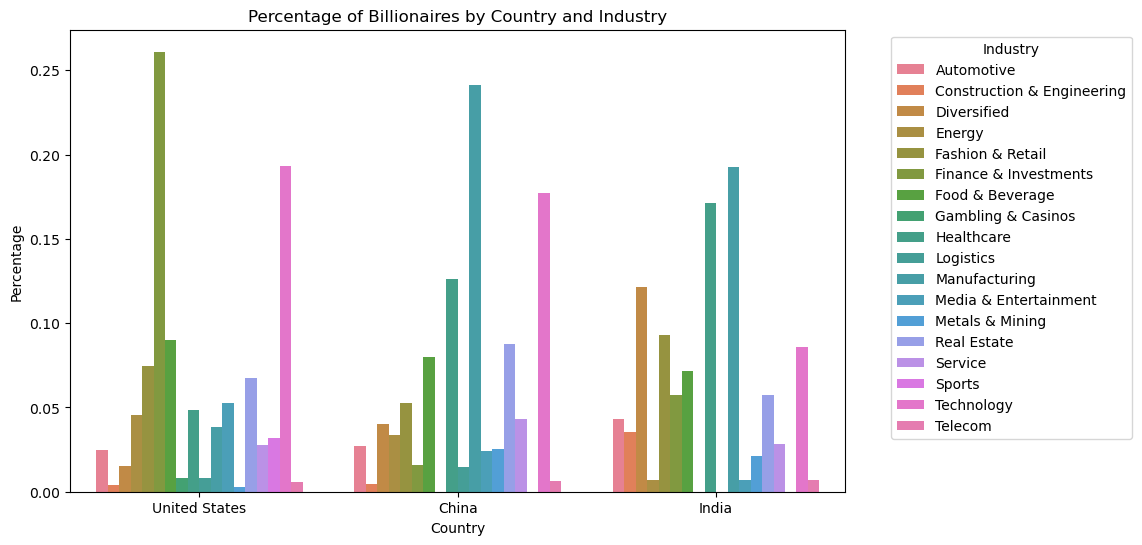

In [264]:
# Reset the index to make 'Country' a column
percents_top_3_reset = percents_top_3.reset_index()

percents_top_3_reset = percents_top_3.reset_index().rename(columns={'index': 'Country'})
percents_top_3_melted = percents_top_3_reset.melt(id_vars='Country', var_name='Industry', value_name='Percentage')
    # Note: so .melt() changes the data from wide format (w/ many cols) to long format (Country/Industry/Percentage),
    # allowing the seaborn library to treat each row as a single observation. 

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Percentage', hue='Industry', data=percents_top_3_melted)

# Add titles and labels
plt.title('Percentage of Billionaires by Country and Industry')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### D.6. Association [1 points]

**Is there an association between a billionaire’s country of residence in 2021 and the industry in which they earned their wealth? Explain your reasoning.**

To answer this, consider:

- Do certain industries appear to dominate in specific countries?
- Are there noticeable patterns where some countries have a strong presence in industries like **technology**, **finance**, or **manufacturing**, while others do not?
- Does the distribution of industries **vary significantly** from one country to another? 

Please explain your answer

I think there's certainly an association between a billionaire's country of residence (in 2021) and the industry in which they earned their wealth. The clearest example is the extremely high proportion of billionaires in the "Finance and Investments" industry in the U.S. contrasting with the surprisingly low proportions in that field in both China and India. On the other hand, the latter two have similarly high dominance in "Manufacturing", which makes sense since both China and India are known to be centers of manufacturing (much more so than the U.S.). 

India has a more even distribution of billionaires across many of its industries, with some emphasis on "Healthcare" & "Manufacturing", while the U.S. has a very polarized distribution ("Finance and Investments" & "Technology" dominate). China is mixed, but definitely stands out in "Manufacturing" & "Technology". 

In short, while there is overlap in industries where billionaires are prominent, the differences in distributions imply that there is an association between a billionaire's country of residence and their industry. 

## E. Billionaires in Their 40s vs. 50s

In this section, we’ll explore how **young billionaires** compare by decade — specifically, those in their **20s** versus those in their **30s**.

---

### E.1. Billionaires in Their 40s [1 points]

Calculate the **average net worth** of billionaires who are currently in their **40s**.

In [265]:
# Filter for bill.s in 40s
forties_billionaires = df[df['Age(years)'] >= 40][df['Age(years)'] < 50]
# Get avg
avg_net_worth_40s = forties_billionaires['NetWorth(unit: billions)'].mean()
print("$", avg_net_worth_40s, "billion")

$ 4.737627118644069 billion


/var/folders/hz/hjqjxs0908g99khf9sknshhc0000gn/T/ipykernel_60123/3206193439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  forties_billionaires = df[df['Age(years)'] >= 40][df['Age(years)'] < 50]


### E.2. Billionaires in Their 50s [1 points]

Now calculate the **average net worth** of billionaires who are in their **50s**.

In [266]:
# Filter for bill.s in 50s
fifties_billionaires = df[df['Age(years)'] >= 50][df['Age(years)'] < 60]
# Get avg
avg_net_worth_50s = fifties_billionaires['NetWorth(unit: billions)'].mean()
print("$", avg_net_worth_50s, "billion")

$ 4.399075297225892 billion


/var/folders/hz/hjqjxs0908g99khf9sknshhc0000gn/T/ipykernel_60123/768967707.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifties_billionaires = df[df['Age(years)'] >= 50][df['Age(years)'] < 60]


### E.3. What Percent of 2021 Billionaires Are in Their 40s? [1 points]

Calculate the **percentage** of 2021 billionaires who are in their **40s**. 
> 🧠 **Note:** Your final answer should be written in **a single line of code** to receive full credit.

In [267]:
print(100 * forties_billionaires.shape[0] / df.shape[0], "%")

10.707803992740471 %


### E.4. What Percent of 2021 Billionaires Are in Their 50s? [1 points]

Calculate the **percentage** of 2021 billionaires who are in their **50s**.
> 🧠 **Note:** Your final answer should be written in **a single line of code** to receive full credit.

In [268]:
print(100 * fifties_billionaires.shape[0] / df.shape[0], "%")

27.477313974591652 %


### E.5. What Percentage of Billionaires in Their 40s Live in the United States? [1 points]

Calculate the **percentage of billionaires in their 40s** who **live in the United States**.
> 🧠 **Note:** Your final answer should be written in **a single line of code** to receive full credit.

In [269]:
print(100 * forties_billionaires[df['Country'] == "United States"].shape[0] / df.shape[0], "%")

2.1052631578947367 %


/var/folders/hz/hjqjxs0908g99khf9sknshhc0000gn/T/ipykernel_60123/3348190359.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(100 * forties_billionaires[df['Country'] == "United States"].shape[0] / df.shape[0], "%")


### E.6. What Percentage of Billionaires in Their 50s Live in the United States? [1 points]

Calculate the **percentage of billionaires in their 50s** who **live in the United States**.
> 🧠 **Note:** Your final answer should be written in **a single line of code** to receive full credit.

In [270]:
print(100 * fifties_billionaires[df['Country'] == "United States"].shape[0] / df.shape[0], "%")

4.972776769509982 %


/var/folders/hz/hjqjxs0908g99khf9sknshhc0000gn/T/ipykernel_60123/764678253.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(100 * fifties_billionaires[df['Country'] == "United States"].shape[0] / df.shape[0], "%")
